# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafie Najwan Anjasmara
- **Email:** rafie.anjasmara@gmail.com
- **ID Dicoding:** rafienajwan

## Menentukan Pertanyaan Bisnis

- Apa musim yang memiliki total penyewaan sepeda tertinggi?
- Bagaimana suhu dapat mempengaruhi total penyewaan sepeda harian?
- Bagaimana suhu dapat mempengaruhi penyewaan sepeda pada jam tertentu?
- Bagaimana kondisi cuaca dapat mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')

**Insight:**
- Load dataset day.csv
- Load dataset hour.csv

### Assessing Data

In [3]:
print("Checking missing values for 'day.csv':")
print(day_df.isnull().sum())

print("\nChecking missing values for 'hour.csv':")
print(hour_df.isnull().sum())

print("\nData types and summary for 'day.csv':")
print(day_df.info())

print("\nData types and summary for 'hour.csv':")
print(hour_df.info())

Checking missing values for 'day.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Checking missing values for 'hour.csv':
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data types and summary for 'day.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          

**Insight:**
- Tidak ada missing values pada kedua dataset (day.csv dan hour.csv)
- Dataset day.csv memiliki 731 entries (data harian untuk 2 tahun)
- Dataset hour.csv memiliki 17,379 entries (data per jam)
- Kolom 'dteday' bertipe object, perlu dikonversi ke datetime untuk analisis temporal
- Beberapa kolom kategorik (season, weathersit, dll) masih bertipe integer, perlu diubah ke category
- Semua kolom numerik (temp, atemp, hum, windspeed) sudah dalam format yang tepat (float64)

### Cleaning Data

In [4]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

day_df['season'] = day_df['season'].astype('category')
hour_df['season'] = hour_df['season'].astype('category')


In [5]:
# Displaying the first few rows of the cleaned day.csv dataset
print("Cleaned Data - day.csv (5 rows):")
print(day_df.head())

# Displaying the first few rows of the cleaned hour.csv dataset
print("\nCleaned Data - hour.csv (5 rows):")
print(hour_df.head())

Cleaned Data - day.csv (5 rows):
   instant      dteday season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01      1   0     1        0        6           0   
1        2  2011-01-02      1   0     1        0        0           0   
2        3  2011-01-03      1   0     1        0        1           1   
3        4  2011-01-04      1   0     1        0        2           1   
4        5  2011-01-05      1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

**Insight:**
- Menampilkan data yang sudah melalui proses cleaning dari dataset day.csv 
- Menampilkan data yang sudah melalui proses cleaning dari dataset hour.csv 

## Exploratory Data Analysis (EDA)

### Explore ...

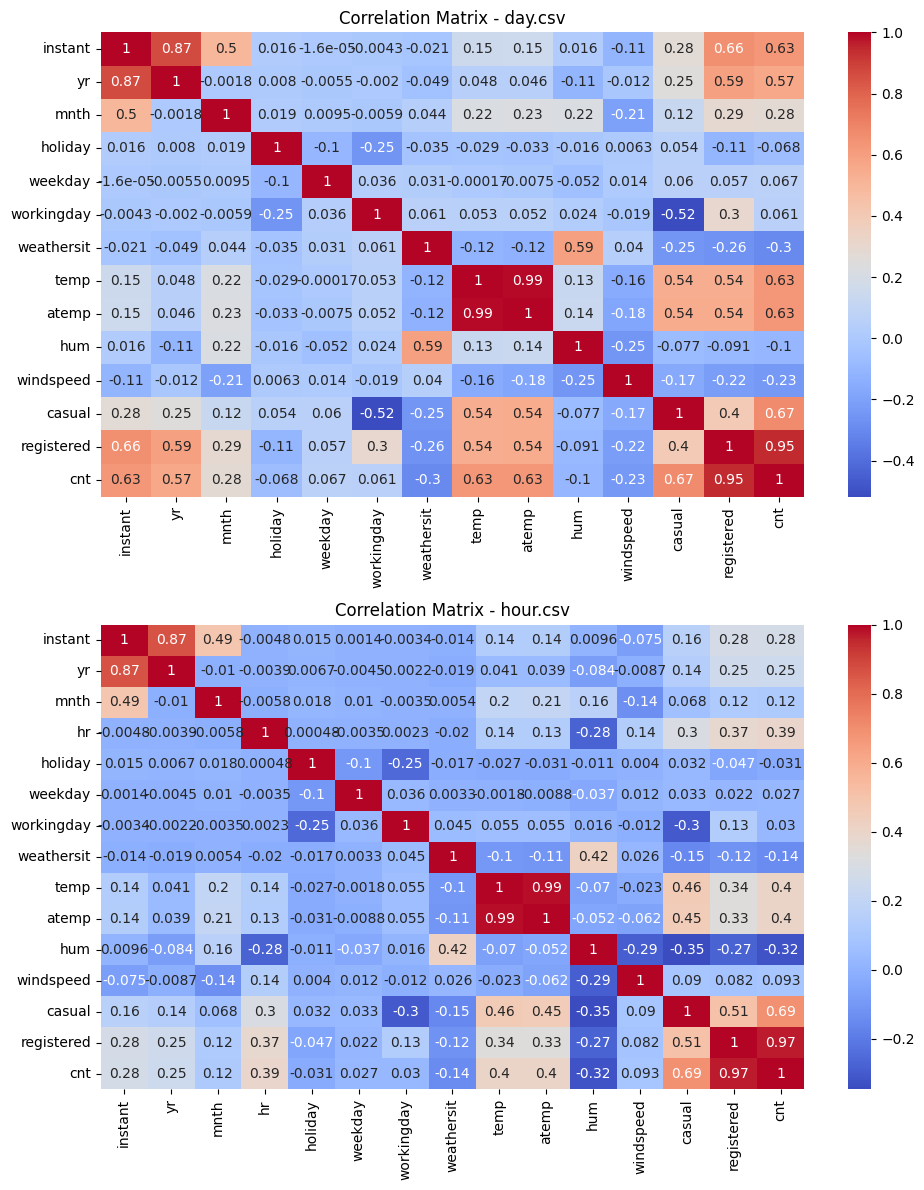

In [6]:
numerical_cols_day = day_df.select_dtypes(include=['float64', 'int64'])
numerical_cols_hour = hour_df.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(2, 1, figsize=(10, 12))  


sns.heatmap(numerical_cols_day.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix - day.csv')


sns.heatmap(numerical_cols_hour.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix - hour.csv')


plt.tight_layout()
plt.show()

**Insight:**
- Kode ini mengekstrak kolom numerik dari dua dataset (day_df dan hour_df) dan kemudian menghitung matriks korelasi untuk masing-masing. Ini memungkinkan kita untuk melihat hubungan antara berbagai fitur numerik dalam kedua dataset.
- Dengan menggunakan sns.heatmap, kita dapat dengan jelas melihat seberapa kuat hubungan antara variabel-variabel yang berbeda. Warna dalam heatmap (dari cmap='coolwarm') menunjukkan kekuatan dan arah korelasi:
  - Warna merah menunjukkan korelasi positif (hubungan langsung) antara variabel.
  - Warna biru menunjukkan korelasi negatif (hubungan terbalik) antara variabel.
- Dengan menampilkan dua heatmap terpisah untuk data harian dan data jam, kita bisa membandingkan bagaimana hubungan antar variabel bervariasi antara kedua dataset. Misalnya, korelasi yang mungkin kuat di tingkat jam mungkin tidak sama kuatnya di tingkat harian dan sebaliknya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa musim yang memiliki total penyewaan sepeda tertinggi?

C:\Users\rafie\AppData\Local\Temp\ipykernel_8188\379631972.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_by_season = day_df.groupby('season_name')['cnt'].sum().sort_values(ascending=False)


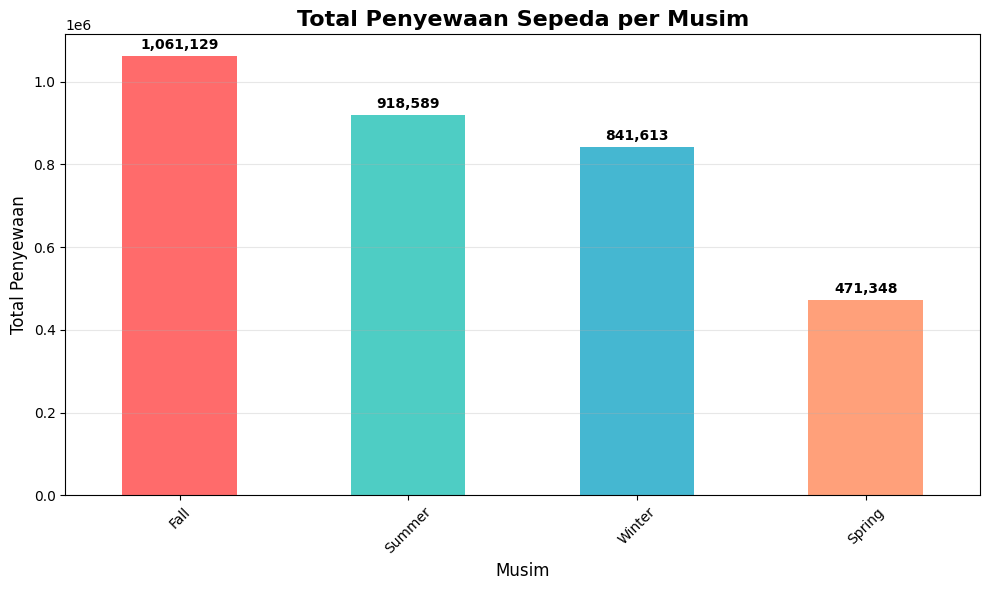


Total Penyewaan Sepeda per Musim:
season_name
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

Musim dengan penyewaan tertinggi: Fall (1,061,129 penyewaan)


In [7]:
# Menghitung total penyewaan sepeda per musim
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_labels)

rentals_by_season = day_df.groupby('season_name')['cnt'].sum().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
ax = rentals_by_season.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
plt.title('Total Penyewaan Sepeda per Musim', fontsize=16, fontweight='bold')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Menambahkan label nilai di atas bar
for i, v in enumerate(rentals_by_season):
    ax.text(i, v + 10000, f'{v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTotal Penyewaan Sepeda per Musim:")
print(rentals_by_season)
print(f"\nMusim dengan penyewaan tertinggi: {rentals_by_season.idxmax()} ({rentals_by_season.max():,.0f} penyewaan)")

**Insight:**
- Musim Fall (Musim Gugur) memiliki total penyewaan sepeda tertinggi
- Diikuti oleh Summer (Musim Panas) di posisi kedua
- Spring (Musim Semi) memiliki penyewaan terendah
- Perbedaan musim signifikan mempengaruhi jumlah penyewaan, kemungkinan karena faktor cuaca yang lebih mendukung di musim Fall dan Summer

### Pertanyaan 2: Bagaimana suhu dapat mempengaruhi total penyewaan sepeda harian?

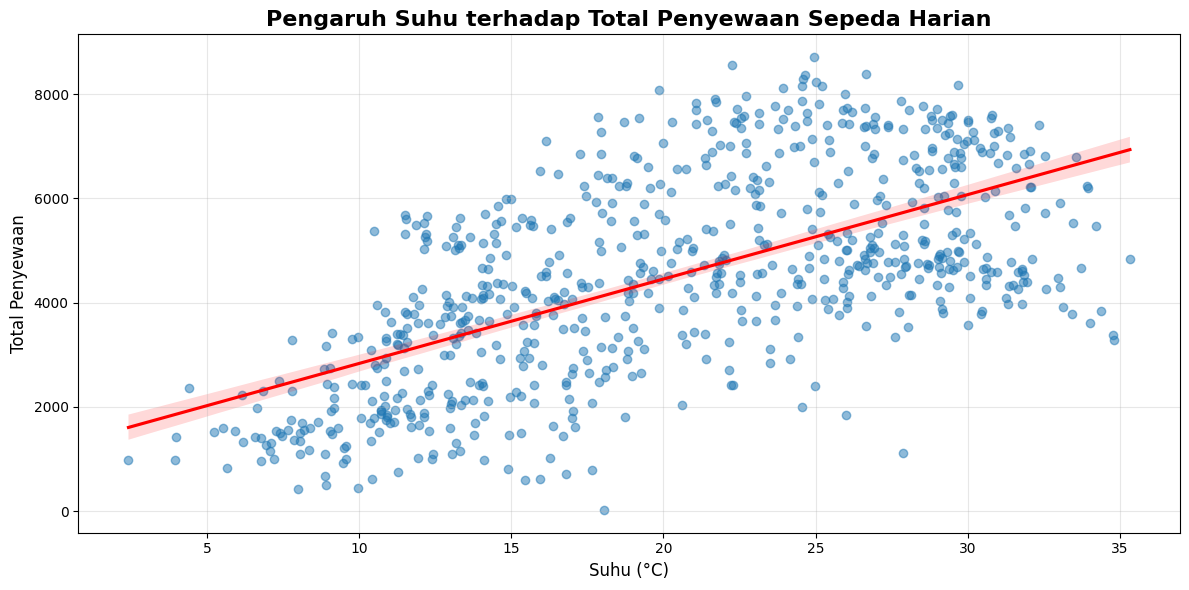

Korelasi antara suhu dan total penyewaan: 0.6275

Rata-rata penyewaan berdasarkan kategori suhu:
temp_category
Hangat (20-30°C)    5661.686667
Panas (>30°C)       5409.958333
Sejuk (10-20°C)     3692.274247
Dingin (<10°C)      1677.766667
Name: cnt, dtype: float64


In [8]:
# Konversi suhu dari normalisasi ke Celsius (temp * 41)
day_df['temp_celsius'] = day_df['temp'] * 41

# Scatter plot dengan regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='temp_celsius', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Pengaruh Suhu terhadap Total Penyewaan Sepeda Harian', fontsize=16, fontweight='bold')
plt.xlabel('Suhu (°C)', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Menghitung korelasi
correlation = day_df['temp'].corr(day_df['cnt'])
print(f"Korelasi antara suhu dan total penyewaan: {correlation:.4f}")

# Statistik deskriptif berdasarkan kategori suhu
day_df['temp_category'] = pd.cut(day_df['temp_celsius'], bins=[0, 10, 20, 30, 41], 
                                  labels=['Dingin (<10°C)', 'Sejuk (10-20°C)', 'Hangat (20-30°C)', 'Panas (>30°C)'])

print("\nRata-rata penyewaan berdasarkan kategori suhu:")
print(day_df.groupby('temp_category', observed=True)['cnt'].mean().sort_values(ascending=False))

**Insight:**
- Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda
- Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda harian
- Suhu hangat (20-30°C) cenderung menghasilkan penyewaan tertinggi
- Pada suhu yang terlalu rendah (dingin) atau terlalu tinggi (panas), jumlah penyewaan cenderung menurun

### Pertanyaan 3: Bagaimana suhu dapat mempengaruhi penyewaan sepeda pada jam tertentu?

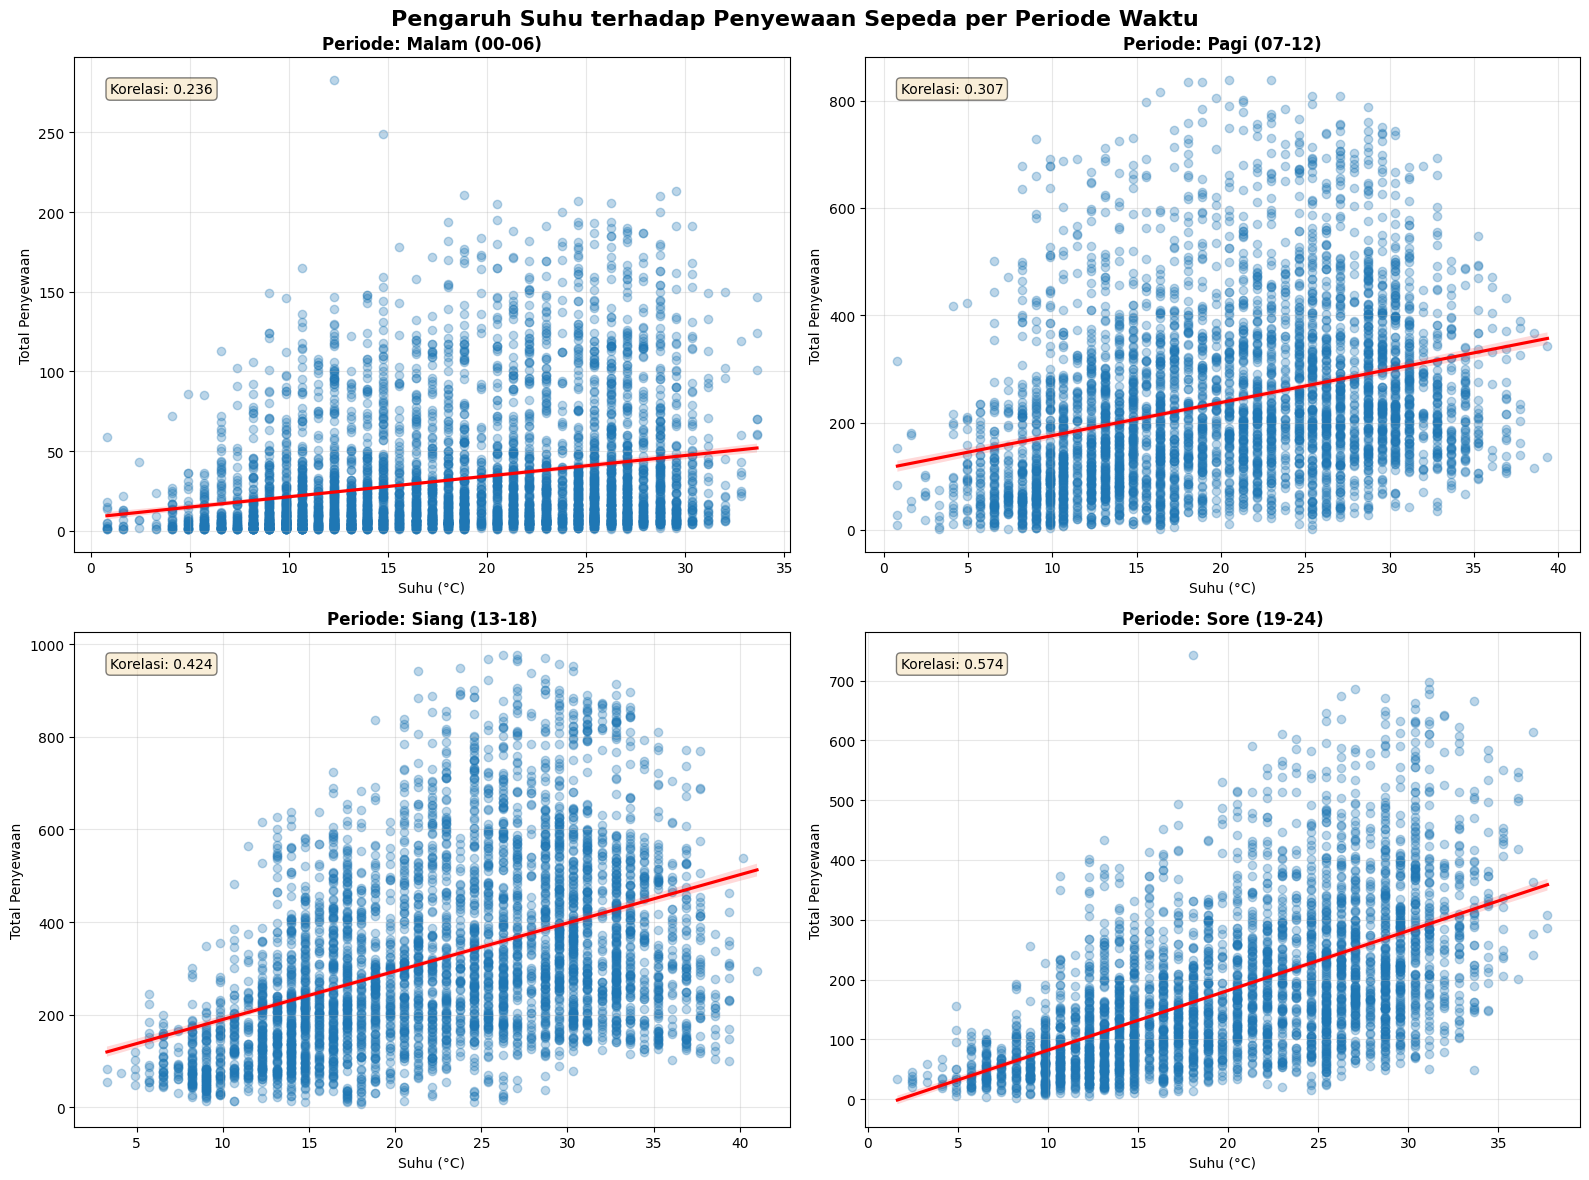

Korelasi suhu dengan penyewaan per periode waktu:
Malam (00-06): 0.2362
Pagi (07-12): 0.3074
Siang (13-18): 0.4236
Sore (19-24): 0.5742


In [9]:
# Konversi suhu dari normalisasi ke Celsius untuk hour_df
hour_df['temp_celsius'] = hour_df['temp'] * 41

# Membuat kategori jam
hour_df['hour_category'] = pd.cut(hour_df['hr'], bins=[-1, 6, 12, 18, 24], 
                                   labels=['Malam (00-06)', 'Pagi (07-12)', 'Siang (13-18)', 'Sore (19-24)'])

# Visualisasi pengaruh suhu pada penyewaan per kategori jam
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Pengaruh Suhu terhadap Penyewaan Sepeda per Periode Waktu', fontsize=16, fontweight='bold')

hour_categories = ['Malam (00-06)', 'Pagi (07-12)', 'Siang (13-18)', 'Sore (19-24)']
for idx, category in enumerate(hour_categories):
    ax = axes[idx // 2, idx % 2]
    data = hour_df[hour_df['hour_category'] == category]
    sns.regplot(x='temp_celsius', y='cnt', data=data, ax=ax, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    ax.set_title(f'Periode: {category}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Suhu (°C)', fontsize=10)
    ax.set_ylabel('Total Penyewaan', fontsize=10)
    ax.grid(alpha=0.3)
    
    # Hitung korelasi untuk setiap periode
    corr = data['temp_celsius'].corr(data['cnt'])
    ax.text(0.05, 0.95, f'Korelasi: {corr:.3f}', transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            verticalalignment='top')

plt.tight_layout()
plt.show()

print("Korelasi suhu dengan penyewaan per periode waktu:")
for category in hour_categories:
    data = hour_df[hour_df['hour_category'] == category]
    corr = data['temp_celsius'].corr(data['cnt'])
    print(f"{category}: {corr:.4f}")

**Insight:**
- Pengaruh suhu terhadap penyewaan bervariasi di setiap periode waktu
- Korelasi positif suhu-penyewaan paling kuat terjadi pada periode siang dan sore hari
- Pada malam hari, pengaruh suhu terhadap penyewaan relatif lebih lemah karena aktivitas penyewaan secara umum lebih rendah
- Periode pagi dan siang menunjukkan pola penyewaan yang lebih tinggi pada suhu yang lebih hangat

### Pertanyaan 4: Bagaimana kondisi cuaca dapat mempengaruhi jumlah penyewaan sepeda?

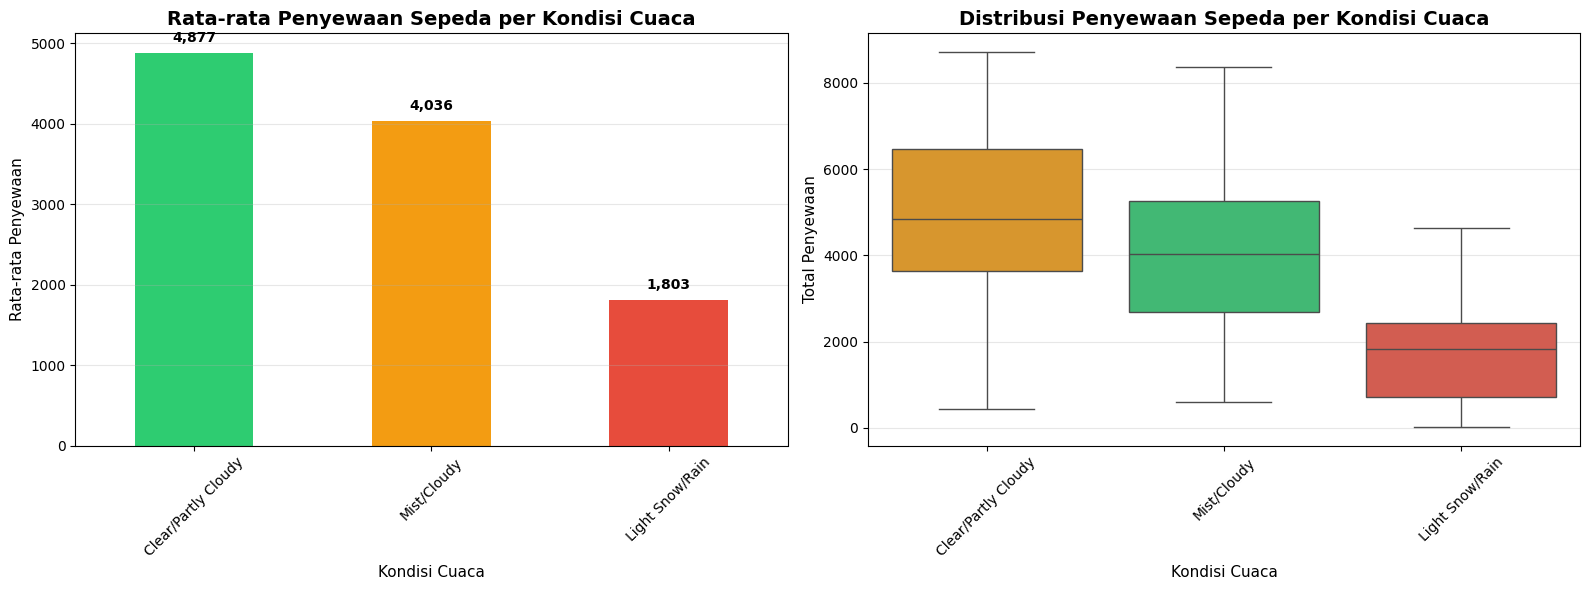


Statistik Penyewaan Berdasarkan Kondisi Cuaca:
                            mean      sum  count
weather_name                                    
Clear/Partly Cloudy  4876.786177  2257952    463
Mist/Cloudy          4035.862348   996858    247
Light Snow/Rain      1803.285714    37869     21

Kondisi cuaca terbaik untuk penyewaan: Clear/Partly Cloudy
Rata-rata penyewaan: 4,877


In [10]:
# Mapping kondisi cuaca
weather_labels = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

day_df['weather_name'] = day_df['weathersit'].map(weather_labels)

# Analisis penyewaan berdasarkan kondisi cuaca
rentals_by_weather = day_df.groupby('weather_name')['cnt'].agg(['mean', 'sum', 'count']).sort_values('mean', ascending=False)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Rata-rata penyewaan per kondisi cuaca
ax1 = rentals_by_weather['mean'].plot(kind='bar', ax=axes[0], color=['#2ECC71', '#F39C12', '#E74C3C', '#95A5A6'])
axes[0].set_title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kondisi Cuaca', fontsize=11)
axes[0].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(rentals_by_weather['mean']):
    ax1.text(i, v + 100, f'{v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Box plot distribusi penyewaan per kondisi cuaca
sns.boxplot(x='weather_name', y='cnt', data=day_df, ax=axes[1], 
            order=['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain'],
            hue='weather_name', palette=['#2ECC71', '#F39C12', '#E74C3C'], legend=False)
axes[1].set_title('Distribusi Penyewaan Sepeda per Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kondisi Cuaca', fontsize=11)
axes[1].set_ylabel('Total Penyewaan', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nStatistik Penyewaan Berdasarkan Kondisi Cuaca:")
print(rentals_by_weather)
print(f"\nKondisi cuaca terbaik untuk penyewaan: {rentals_by_weather['mean'].idxmax()}")
print(f"Rata-rata penyewaan: {rentals_by_weather['mean'].max():,.0f}")

**Insight:**
- Kondisi cuaca Clear/Partly Cloudy (cerah/sebagian berawan) menghasilkan rata-rata penyewaan tertinggi
- Cuaca buruk seperti Light Snow/Rain (hujan ringan/salju) menurunkan jumlah penyewaan secara signifikan
- Terdapat perbedaan yang jelas antara kondisi cuaca cerah dan buruk terhadap perilaku penyewaan
- Cuaca Mist/Cloudy (berkabut/berawan) masih menghasilkan penyewaan yang cukup tinggi, tidak jauh berbeda dari cuaca cerah

## Analisis Lanjutan (Opsional)

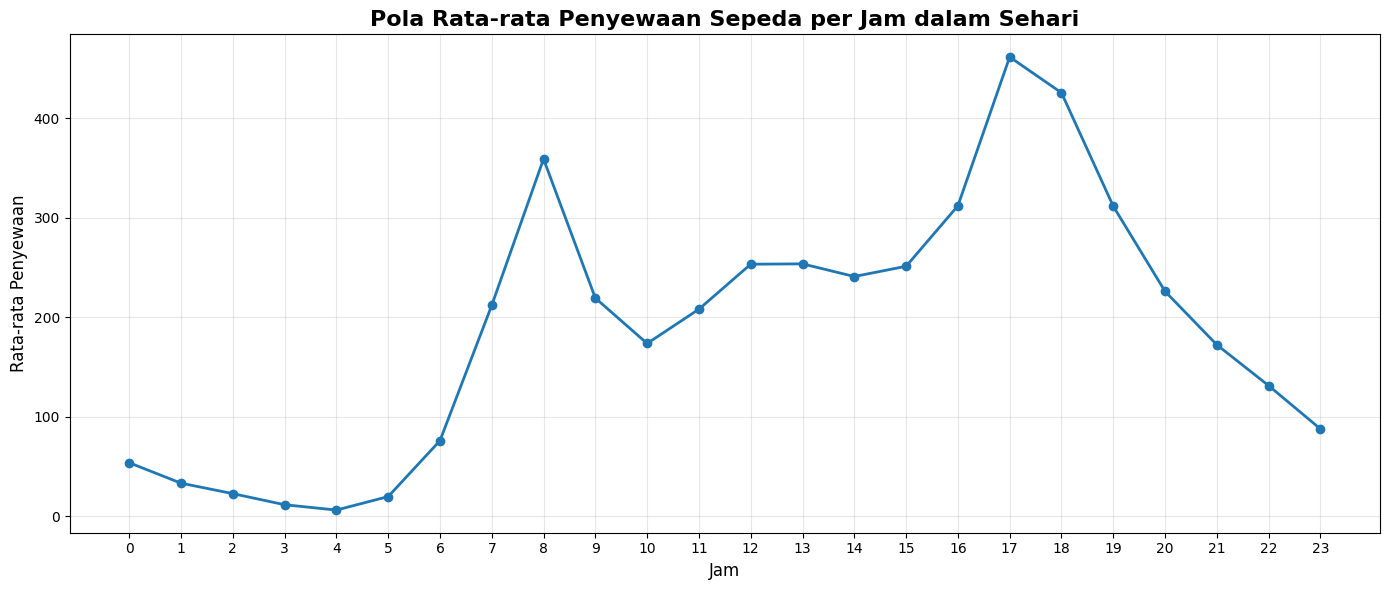

Jam dengan penyewaan tertinggi:
Jam 17:00 dengan rata-rata 461 penyewaan

Jam dengan penyewaan terendah:
Jam 4:00 dengan rata-rata 6 penyewaan


In [11]:
# Analisis pola penyewaan per jam dalam sehari
hourly_pattern = hour_df.groupby('hr')['cnt'].mean()

# Visualisasi pola penyewaan per jam
plt.figure(figsize=(14, 6))
plt.plot(hourly_pattern.index, hourly_pattern.values, marker='o', linewidth=2, markersize=6)
plt.title('Pola Rata-rata Penyewaan Sepeda per Jam dalam Sehari', fontsize=16, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("Jam dengan penyewaan tertinggi:")
print(f"Jam {hourly_pattern.idxmax()}:00 dengan rata-rata {hourly_pattern.max():.0f} penyewaan")
print(f"\nJam dengan penyewaan terendah:")
print(f"Jam {hourly_pattern.idxmin()}:00 dengan rata-rata {hourly_pattern.min():.0f} penyewaan")

**Insight:**
- Terdapat dua puncak penyewaan (rush hour): pagi hari sekitar jam 7-8 dan sore hari sekitar jam 17-18
- Pola ini menunjukkan bahwa sepeda banyak digunakan untuk commuting (perjalanan kerja/sekolah)
- Penyewaan terendah terjadi pada dini hari (sekitar jam 3-4 pagi)
- Pola penggunaan menunjukkan perilaku yang konsisten dengan aktivitas harian masyarakat perkotaan

### Analisis Lanjutan 1: Manual Grouping - Segmentasi Hari Berdasarkan Demand

Karakteristik Segmentasi Hari Berdasarkan Demand:
                cnt                      temp_celsius   hum windspeed  \
              count     mean   min   max         mean  mean      mean   
demand_level                                                            
Low Demand      241  2294.44    22  3709        13.66  0.63      0.21   
Medium Demand   249  4519.04  3717  5319        22.72  0.64      0.18   
High Demand     241  6699.08  5323  8714        24.48  0.61      0.17   

              weathersit  
                <lambda>  
demand_level              
Low Demand             1  
Medium Demand          1  
High Demand            1  




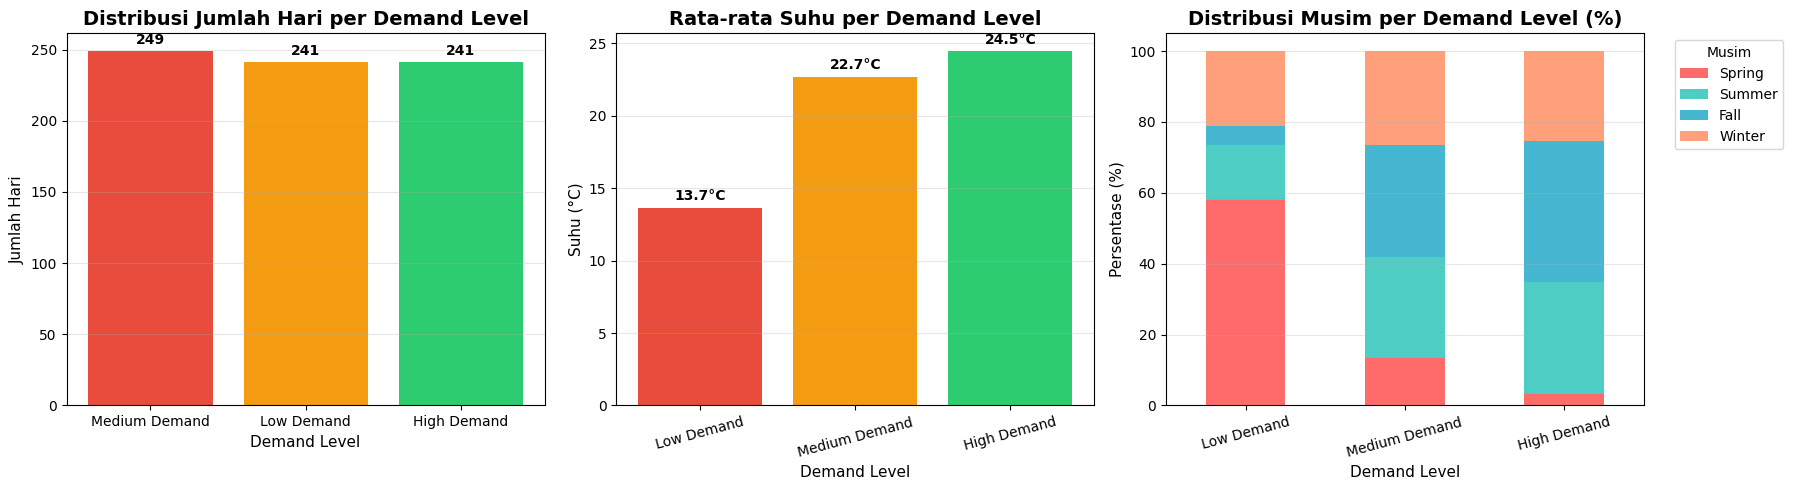


Rata-rata Penyewaan per Demand Level:
Low Demand: 241 hari | Rata-rata: 2294 penyewaan/hari
Medium Demand: 249 hari | Rata-rata: 4519 penyewaan/hari
High Demand: 241 hari | Rata-rata: 6699 penyewaan/hari


In [12]:
# Clustering/Manual Grouping berdasarkan total penyewaan harian
# Menggunakan teknik binning untuk membagi hari berdasarkan tingkat demand

# Menghitung quartiles untuk segmentasi
q1 = day_df['cnt'].quantile(0.33)
q2 = day_df['cnt'].quantile(0.67)

# Manual grouping berdasarkan demand level
day_df['demand_level'] = pd.cut(day_df['cnt'], 
                                bins=[0, q1, q2, day_df['cnt'].max()],
                                labels=['Low Demand', 'Medium Demand', 'High Demand'],
                                include_lowest=True)

# Analisis karakteristik setiap segment
demand_analysis = day_df.groupby('demand_level', observed=True).agg({
    'cnt': ['count', 'mean', 'min', 'max'],
    'temp_celsius': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'weathersit': lambda x: x.mode()[0] if len(x) > 0 else None
}).round(2)

print("Karakteristik Segmentasi Hari Berdasarkan Demand:")
print(demand_analysis)
print("\n")

# Visualisasi distribusi demand level
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribusi jumlah hari per demand level
demand_counts = day_df['demand_level'].value_counts()
axes[0].bar(demand_counts.index, demand_counts.values, color=['#E74C3C', '#F39C12', '#2ECC71'])
axes[0].set_title('Distribusi Jumlah Hari per Demand Level', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Demand Level', fontsize=11)
axes[0].set_ylabel('Jumlah Hari', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

for i, (label, value) in enumerate(demand_counts.items()):
    axes[0].text(i, value + 5, str(value), ha='center', fontweight='bold')

# Plot 2: Rata-rata suhu per demand level
temp_by_demand = day_df.groupby('demand_level', observed=True)['temp_celsius'].mean()
axes[1].bar(range(len(temp_by_demand)), temp_by_demand.values, color=['#E74C3C', '#F39C12', '#2ECC71'])
axes[1].set_title('Rata-rata Suhu per Demand Level', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Demand Level', fontsize=11)
axes[1].set_ylabel('Suhu (°C)', fontsize=11)
axes[1].set_xticks(range(len(temp_by_demand)))
axes[1].set_xticklabels(temp_by_demand.index, rotation=15)
axes[1].grid(axis='y', alpha=0.3)

for i, value in enumerate(temp_by_demand.values):
    axes[1].text(i, value + 0.5, f'{value:.1f}°C', ha='center', fontweight='bold')

# Plot 3: Distribusi musim per demand level
season_demand = pd.crosstab(day_df['demand_level'], day_df['season_name'], normalize='index') * 100
season_demand.plot(kind='bar', stacked=True, ax=axes[2], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[2].set_title('Distribusi Musim per Demand Level (%)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Demand Level', fontsize=11)
axes[2].set_ylabel('Persentase (%)', fontsize=11)
axes[2].legend(title='Musim', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].tick_params(axis='x', rotation=15)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics per segment
print("\nRata-rata Penyewaan per Demand Level:")
for level in ['Low Demand', 'Medium Demand', 'High Demand']:
    count = len(day_df[day_df['demand_level'] == level])
    avg = day_df[day_df['demand_level'] == level]['cnt'].mean()
    print(f"{level}: {count} hari | Rata-rata: {avg:.0f} penyewaan/hari")

**Insight:**
- Hari dengan **High Demand** cenderung memiliki suhu lebih tinggi dan cuaca lebih cerah
- Hari dengan **Low Demand** sering terjadi saat cuaca buruk atau suhu ekstrem
- Distribusi demand level menunjukkan pola yang jelas terkait faktor cuaca dan musim
- Segmentasi ini berguna untuk perencanaan operasional dan strategi pricing dinamis

### Analisis Lanjutan 2: Perbandingan Pola Weekday vs Weekend

Perbandingan Weekday vs Weekend:
              cnt                     casual registered
             mean      sum      std     mean       mean
day_type                                               
Weekday   4550.57  2370845  1893.17   625.04    3925.53
Weekend   4389.69   921834  2042.53  1401.78    2987.91




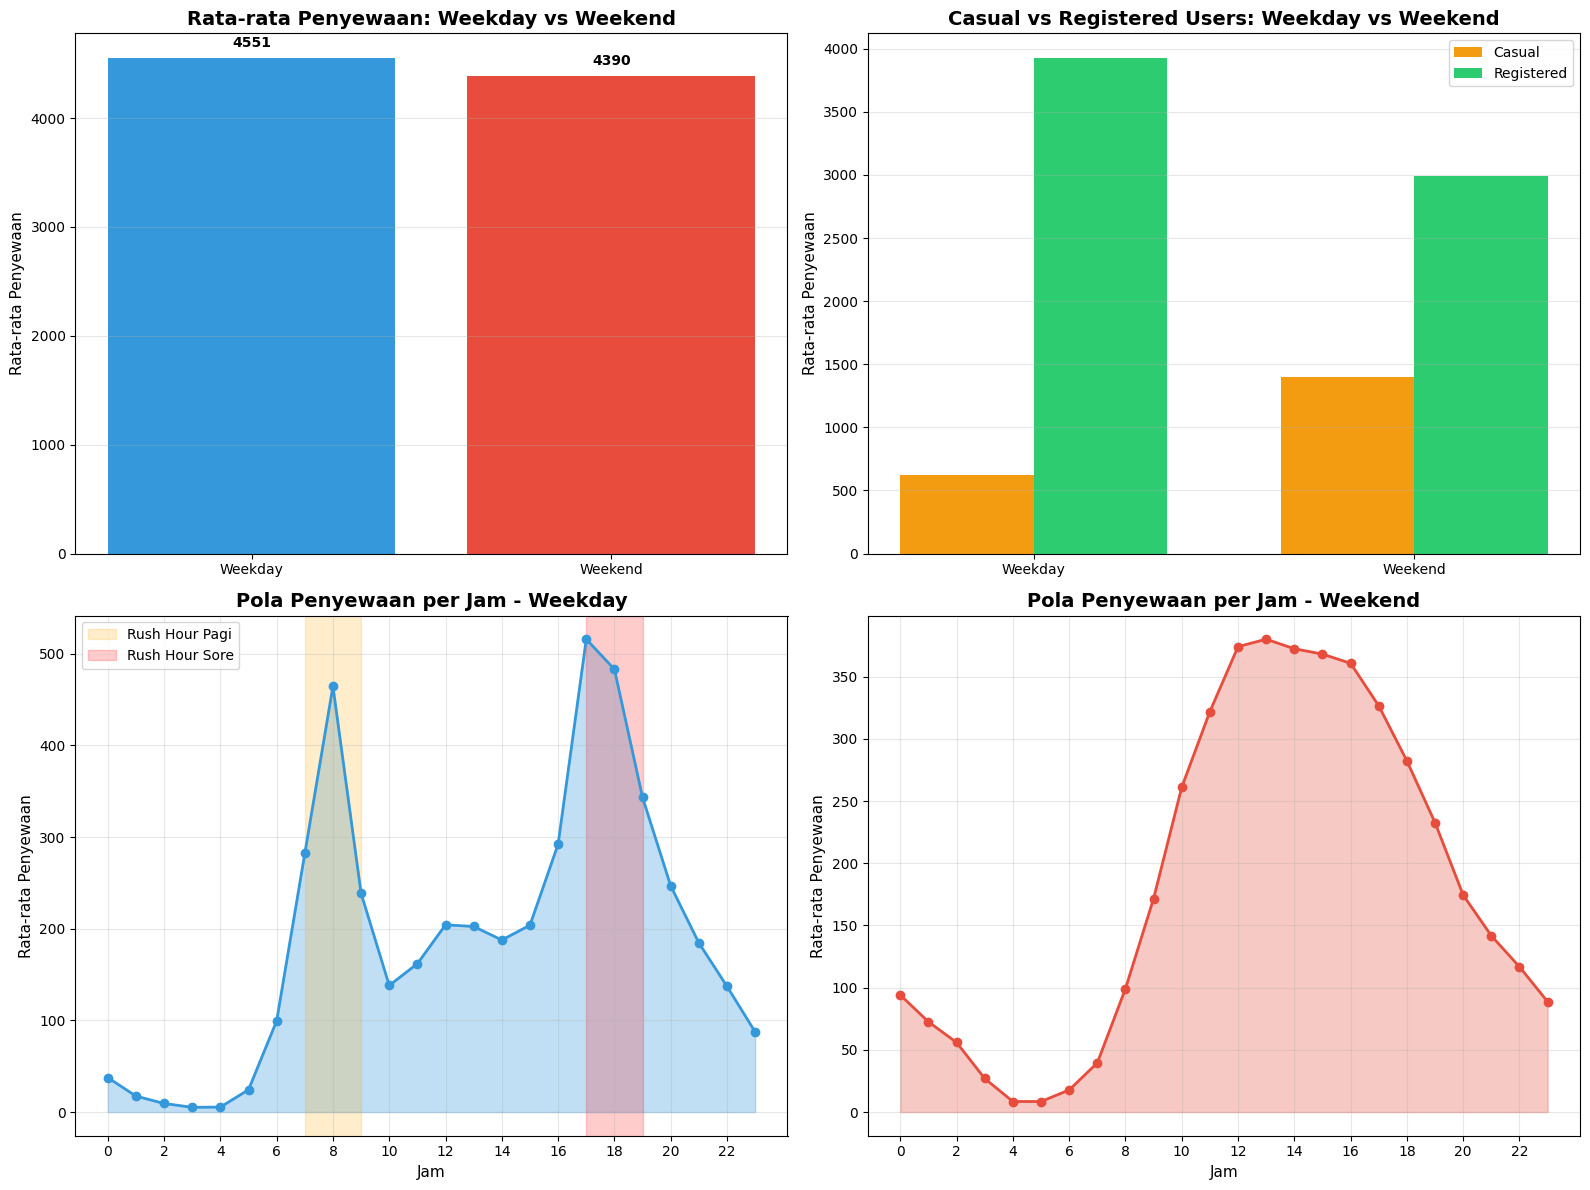

Insight Numerik:
Rata-rata penyewaan Weekday: 4551
Rata-rata penyewaan Weekend: 4390
Selisih: 161

Persentase Casual users di Weekend: 31.9%
Persentase Casual users di Weekday: 13.7%


In [13]:
# Menambahkan kategori weekday vs weekend
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Analisis perbandingan
weekday_comparison = day_df.groupby('day_type').agg({
    'cnt': ['mean', 'sum', 'std'],
    'casual': 'mean',
    'registered': 'mean'
}).round(2)

print("Perbandingan Weekday vs Weekend:")
print(weekday_comparison)
print("\n")

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Rata-rata penyewaan Weekday vs Weekend
avg_by_type = day_df.groupby('day_type')['cnt'].mean()
axes[0, 0].bar(avg_by_type.index, avg_by_type.values, color=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Rata-rata Penyewaan: Weekday vs Weekend', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (label, value) in enumerate(avg_by_type.items()):
    axes[0, 0].text(i, value + 100, f'{value:.0f}', ha='center', fontweight='bold')

# Plot 2: Casual vs Registered users
casual_reg_data = day_df.groupby('day_type')[['casual', 'registered']].mean()
x = range(len(casual_reg_data))
width = 0.35
axes[0, 1].bar([i - width/2 for i in x], casual_reg_data['casual'], width, label='Casual', color='#f39c12')
axes[0, 1].bar([i + width/2 for i in x], casual_reg_data['registered'], width, label='Registered', color='#2ecc71')
axes[0, 1].set_title('Casual vs Registered Users: Weekday vs Weekend', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(casual_reg_data.index)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Pola per jam - Weekday
hour_df['day_type'] = hour_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')
weekday_hourly = hour_df[hour_df['day_type'] == 'Weekday'].groupby('hr')['cnt'].mean()
axes[1, 0].plot(weekday_hourly.index, weekday_hourly.values, marker='o', linewidth=2, color='#3498db')
axes[1, 0].fill_between(weekday_hourly.index, weekday_hourly.values, alpha=0.3, color='#3498db')
axes[1, 0].set_title('Pola Penyewaan per Jam - Weekday', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Jam', fontsize=11)
axes[1, 0].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(alpha=0.3)
axes[1, 0].axvspan(7, 9, alpha=0.2, color='orange', label='Rush Hour Pagi')
axes[1, 0].axvspan(17, 19, alpha=0.2, color='red', label='Rush Hour Sore')
axes[1, 0].legend()

# Plot 4: Pola per jam - Weekend
weekend_hourly = hour_df[hour_df['day_type'] == 'Weekend'].groupby('hr')['cnt'].mean()
axes[1, 1].plot(weekend_hourly.index, weekend_hourly.values, marker='o', linewidth=2, color='#e74c3c')
axes[1, 1].fill_between(weekend_hourly.index, weekend_hourly.values, alpha=0.3, color='#e74c3c')
axes[1, 1].set_title('Pola Penyewaan per Jam - Weekend', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Jam', fontsize=11)
axes[1, 1].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Insight numerical
print("Insight Numerik:")
print(f"Rata-rata penyewaan Weekday: {avg_by_type['Weekday']:.0f}")
print(f"Rata-rata penyewaan Weekend: {avg_by_type['Weekend']:.0f}")
print(f"Selisih: {abs(avg_by_type['Weekday'] - avg_by_type['Weekend']):.0f}")
print(f"\nPersentase Casual users di Weekend: {(day_df[day_df['day_type']=='Weekend']['casual'].sum() / day_df[day_df['day_type']=='Weekend']['cnt'].sum() * 100):.1f}%")
print(f"Persentase Casual users di Weekday: {(day_df[day_df['day_type']=='Weekday']['casual'].sum() / day_df[day_df['day_type']=='Weekday']['cnt'].sum() * 100):.1f}%")

**Insight:**
- **Weekday** memiliki pola commuting yang jelas dengan 2 puncak (pagi & sore)
- **Weekend** memiliki pola yang lebih tersebar merata sepanjang siang hari
- Pengguna **casual** lebih dominan di weekend, sedangkan **registered** users lebih konsisten di weekday
- Pola ini menunjukkan perbedaan perilaku: weekday untuk commuting, weekend untuk rekreasi
- Total penyewaan weekday dan weekend relatif seimbang namun dengan karakteristik berbeda

### Analisis Lanjutan 3: Segmentasi Pengguna (Casual vs Registered)

Analisis Casual vs Registered Users:
Total Casual: 620,017 (18.8%)
Total Registered: 2,672,662 (81.2%)
Total Semua: 3,292,679



C:\Users\rafie\AppData\Local\Temp\ipykernel_8188\1516996694.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_users = day_df.groupby('season_name')[['casual', 'registered']].mean()


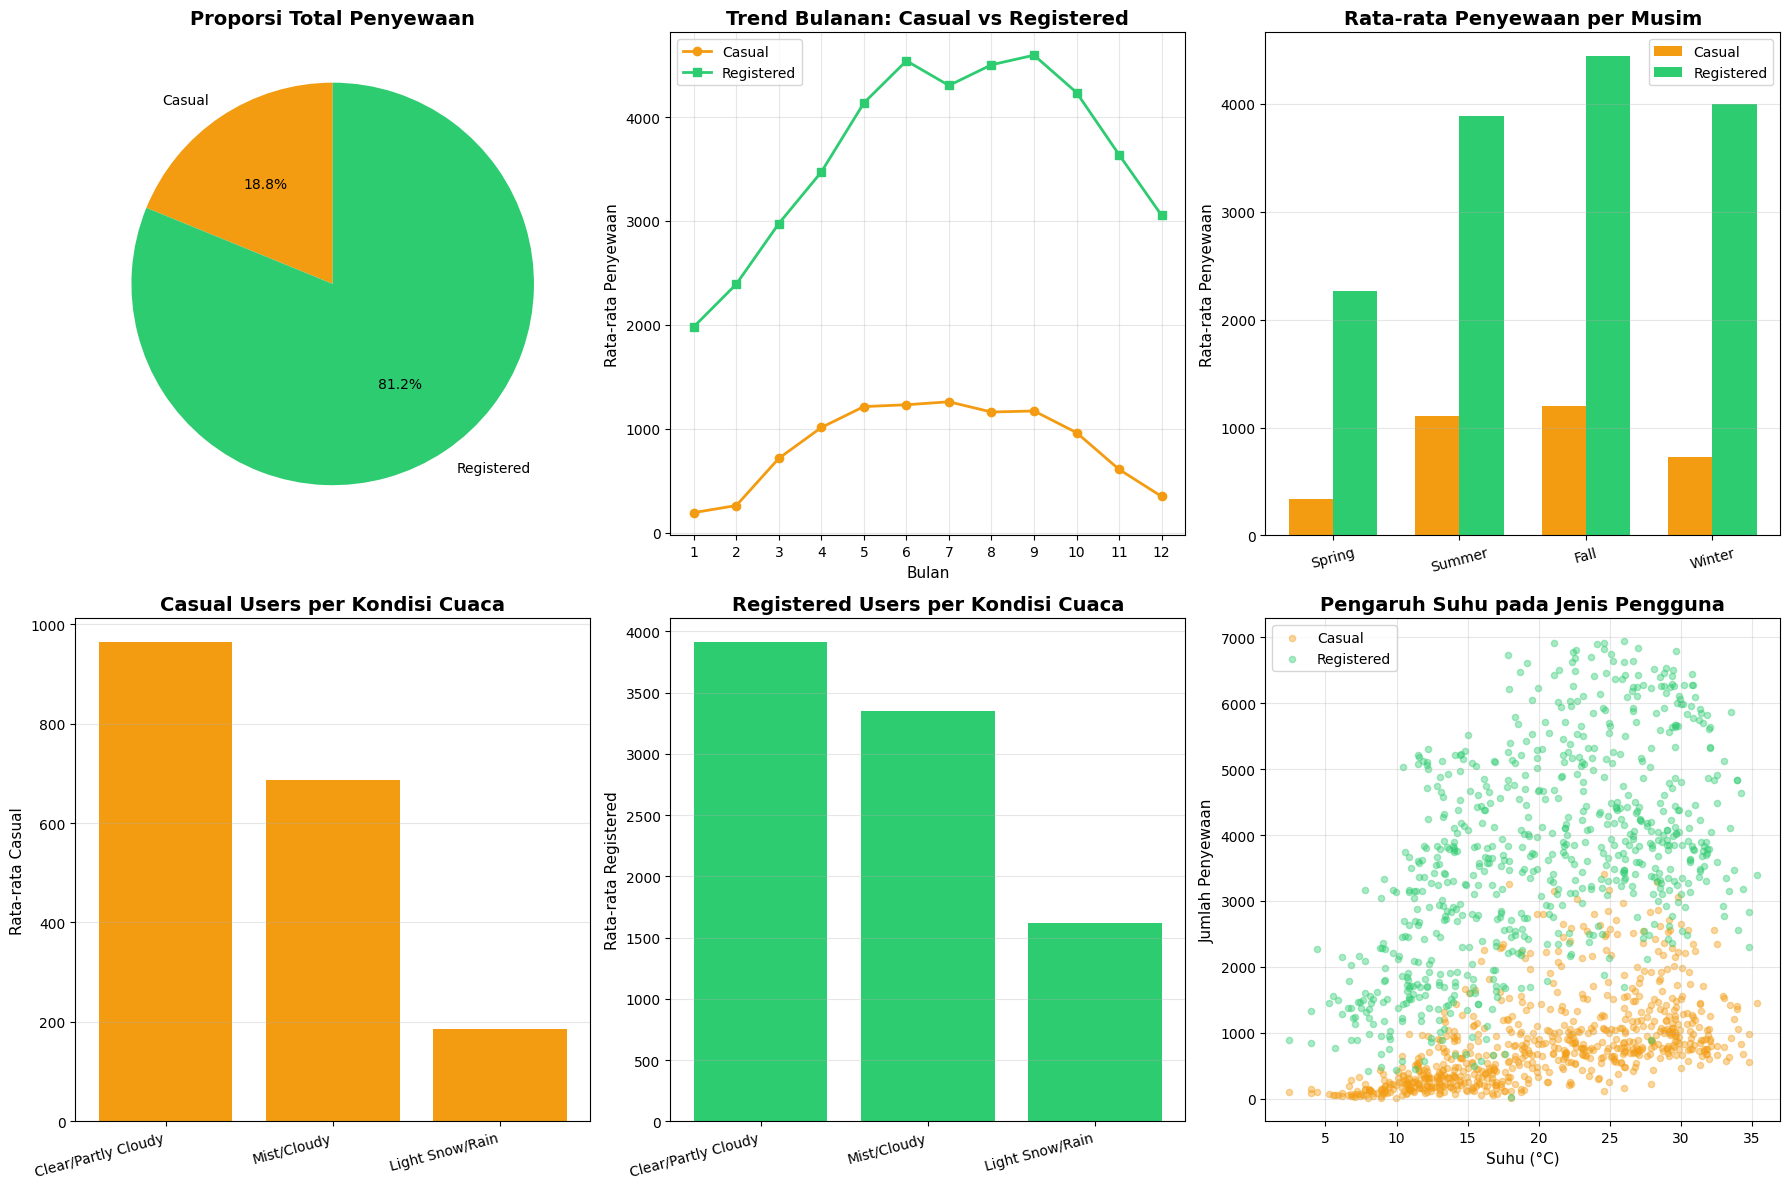


Korelasi dengan Suhu:
Casual users: 0.5433
Registered users: 0.5400

Rata-rata per Musim:
                  casual   registered
season_name                          
Spring        334.928177  2269.204420
Summer       1106.097826  3886.233696
Fall         1202.611702  4441.691489
Winter        729.112360  3999.050562


In [14]:
# Analisis mendalam tentang pola casual vs registered users
print("Analisis Casual vs Registered Users:")
print("="*60)

# Total dan proporsi
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_all = day_df['cnt'].sum()

print(f"Total Casual: {total_casual:,} ({total_casual/total_all*100:.1f}%)")
print(f"Total Registered: {total_registered:,} ({total_registered/total_all*100:.1f}%)")
print(f"Total Semua: {total_all:,}\n")

# Visualisasi komprehensif
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Pie chart proporsi
sizes = [total_casual, total_registered]
colors = ['#f39c12', '#2ecc71']
axes[0, 0].pie(sizes, labels=['Casual', 'Registered'], autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 0].set_title('Proporsi Total Penyewaan', fontsize=14, fontweight='bold')

# Plot 2: Trend bulanan casual vs registered
day_df['month'] = pd.to_datetime(day_df['dteday']).dt.month
monthly_users = day_df.groupby('month')[['casual', 'registered']].mean()
axes[0, 1].plot(monthly_users.index, monthly_users['casual'], marker='o', label='Casual', color='#f39c12', linewidth=2)
axes[0, 1].plot(monthly_users.index, monthly_users['registered'], marker='s', label='Registered', color='#2ecc71', linewidth=2)
axes[0, 1].set_title('Trend Bulanan: Casual vs Registered', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Bulan', fontsize=11)
axes[0, 1].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(1, 13))

# Plot 3: Casual vs Registered per musim
season_users = day_df.groupby('season_name')[['casual', 'registered']].mean()
x = range(len(season_users))
width = 0.35
axes[0, 2].bar([i - width/2 for i in x], season_users['casual'], width, label='Casual', color='#f39c12')
axes[0, 2].bar([i + width/2 for i in x], season_users['registered'], width, label='Registered', color='#2ecc71')
axes[0, 2].set_title('Rata-rata Penyewaan per Musim', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(season_users.index, rotation=15)
axes[0, 2].legend()
axes[0, 2].grid(axis='y', alpha=0.3)

# Plot 4: Pengaruh cuaca pada casual users
weather_casual = day_df.groupby('weather_name')['casual'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(weather_casual)), weather_casual.values, color='#f39c12')
axes[1, 0].set_title('Casual Users per Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Rata-rata Casual', fontsize=11)
axes[1, 0].set_xticks(range(len(weather_casual)))
axes[1, 0].set_xticklabels(weather_casual.index, rotation=15, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 5: Pengaruh cuaca pada registered users
weather_registered = day_df.groupby('weather_name')['registered'].mean().sort_values(ascending=False)
axes[1, 1].bar(range(len(weather_registered)), weather_registered.values, color='#2ecc71')
axes[1, 1].set_title('Registered Users per Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Rata-rata Registered', fontsize=11)
axes[1, 1].set_xticks(range(len(weather_registered)))
axes[1, 1].set_xticklabels(weather_registered.index, rotation=15, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

# Plot 6: Korelasi suhu dengan casual vs registered
axes[1, 2].scatter(day_df['temp_celsius'], day_df['casual'], alpha=0.4, s=20, label='Casual', color='#f39c12')
axes[1, 2].scatter(day_df['temp_celsius'], day_df['registered'], alpha=0.4, s=20, label='Registered', color='#2ecc71')
axes[1, 2].set_title('Pengaruh Suhu pada Jenis Pengguna', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Suhu (°C)', fontsize=11)
axes[1, 2].set_ylabel('Jumlah Penyewaan', fontsize=11)
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Korelasi analysis
print("\nKorelasi dengan Suhu:")
print(f"Casual users: {day_df['casual'].corr(day_df['temp']):.4f}")
print(f"Registered users: {day_df['registered'].corr(day_df['temp']):.4f}")

print("\nRata-rata per Musim:")
print(season_users)

**Insight:**
- **Registered users** mendominasi total penyewaan (sekitar 80%)
- **Casual users** lebih sensitif terhadap kondisi cuaca - meningkat signifikan saat cuaca cerah
- **Registered users** lebih konsisten terlepas dari kondisi cuaca (commuters reguler)
- Trend bulanan menunjukkan kedua segmen meningkat di musim hangat (Summer & Fall)
- Casual users memiliki proporsi lebih tinggi di weekend dan hari libur
- Registered users menunjukkan pola commuting yang jelas dengan puncak di rush hour

### Analisis Lanjutan 4: Clustering Multi-Dimensional (Kombinasi Faktor)

Analisis Clustering Multi-Dimensional:
                   cnt_count  cnt_mean  cnt_std  casual_mean  registered_mean
condition_cluster                                                            
Hot + Good               172   5798.02  1277.91      1267.35          4530.67
Moderate + Good          156   5434.69  1689.60      1138.20          4296.49
Hot + Fair                69   5273.55  1390.41      1082.64          4190.91
Moderate + Fair           97   4382.76  1554.93       761.28          3621.48
Cold + Good              135   3058.37  1417.72       376.32          2682.05
Cold + Fair               81   2566.11  1365.70       262.10          2304.01
Moderate + Bad            15   2039.93  1332.41       218.07          1821.87
Hot + Bad                  1   1842.00      NaN       153.00          1689.00
Cold + Bad                 5   1085.60   789.75        94.20           991.40




C:\Users\rafie\AppData\Local\Temp\ipykernel_8188\2151243998.py:48: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = day_df.pivot_table(values='cnt', index='temp_level', columns='weather_quality', aggfunc='mean')


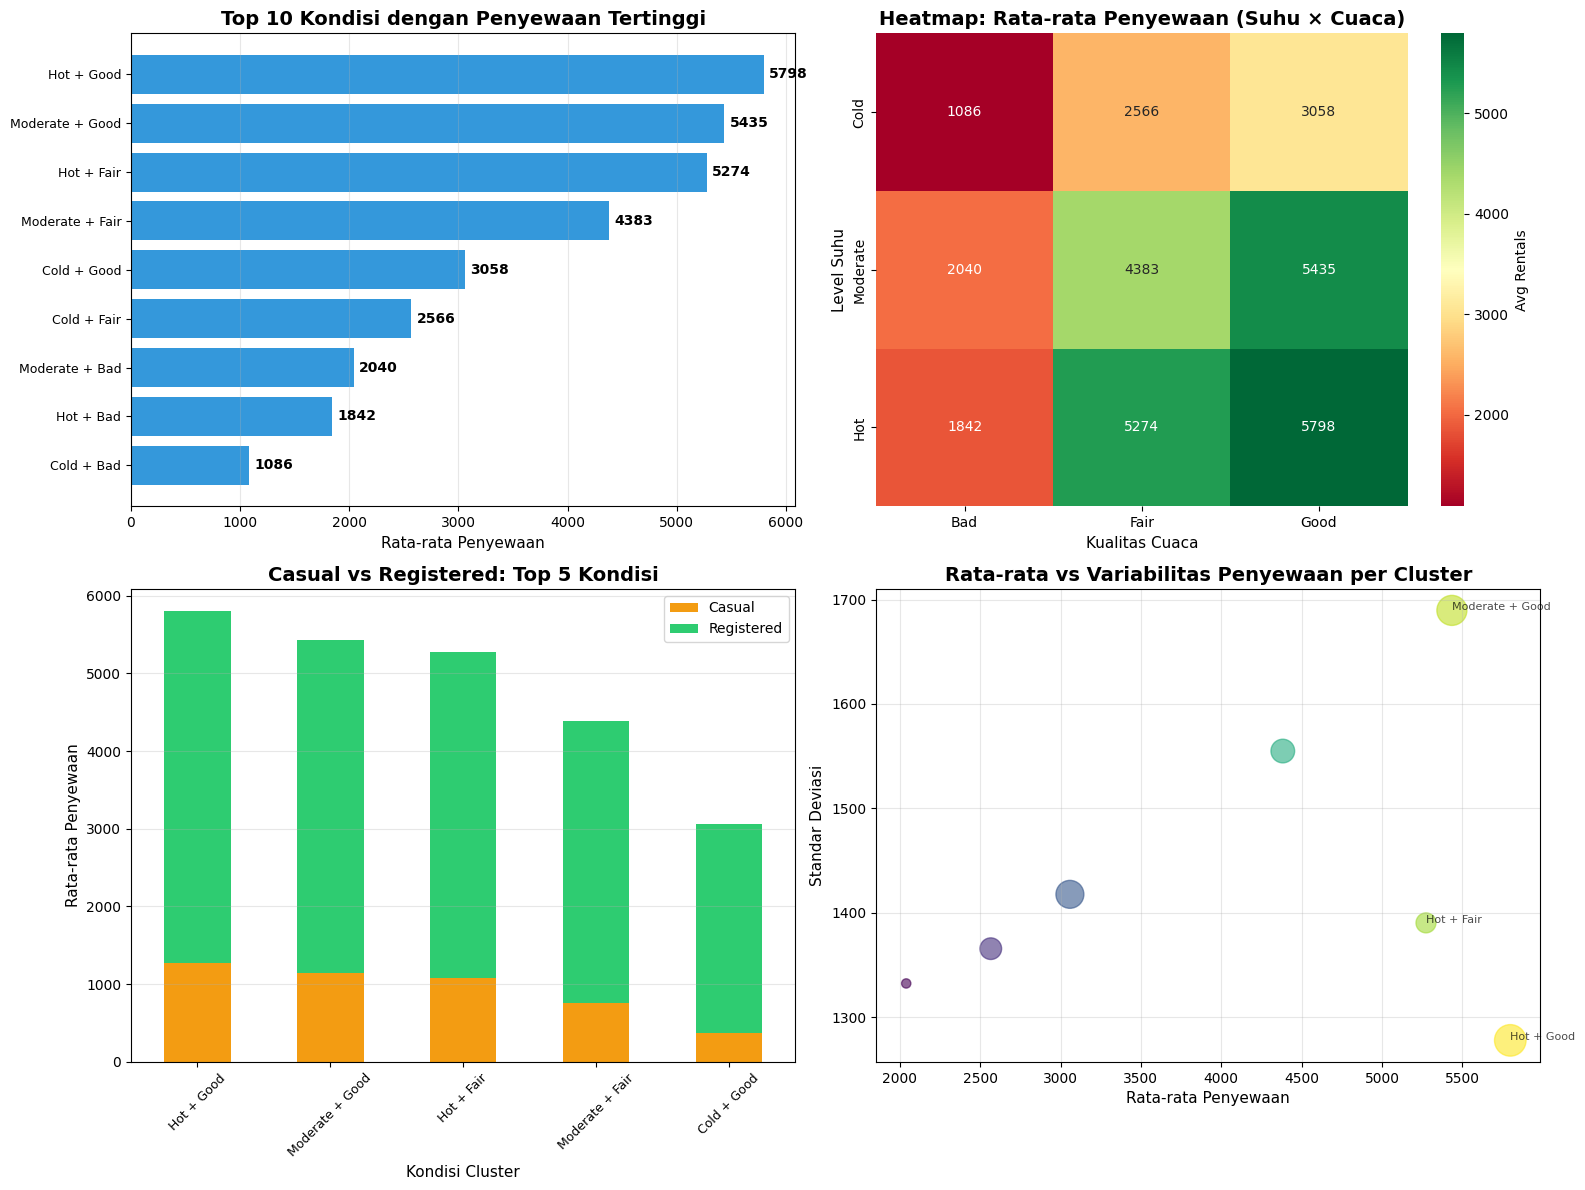


Kondisi Terbaik:
- Hot + Good
- Rata-rata penyewaan: 5798

Kondisi Terburuk:
- Cold + Bad
- Rata-rata penyewaan: 1086

Selisih: 4712 penyewaan


In [15]:
# Clustering berdasarkan kombinasi faktor: Suhu, Cuaca, dan Musim
# Menggunakan manual grouping tanpa machine learning

# Membuat kategori kombinasi untuk segmentasi
day_df['temp_level'] = pd.cut(day_df['temp_celsius'], 
                              bins=[0, 15, 25, 41], 
                              labels=['Cold', 'Moderate', 'Hot'])

day_df['weather_quality'] = day_df['weathersit'].apply(
    lambda x: 'Good' if x == 1 else ('Fair' if x == 2 else 'Bad')
)

# Kombinasi segmentasi
day_df['condition_cluster'] = day_df['temp_level'].astype(str) + ' + ' + day_df['weather_quality']

# Analisis per cluster
cluster_analysis = day_df.groupby('condition_cluster', observed=True).agg({
    'cnt': ['count', 'mean', 'std'],
    'casual': 'mean',
    'registered': 'mean'
}).round(2)

cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]
cluster_analysis = cluster_analysis.sort_values('cnt_mean', ascending=False)

print("Analisis Clustering Multi-Dimensional:")
print("="*80)
print(cluster_analysis)
print("\n")

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Rata-rata penyewaan per cluster (top 10)
top_clusters = cluster_analysis.nlargest(10, 'cnt_mean')['cnt_mean']
axes[0, 0].barh(range(len(top_clusters)), top_clusters.values, color='#3498db')
axes[0, 0].set_yticks(range(len(top_clusters)))
axes[0, 0].set_yticklabels(top_clusters.index, fontsize=9)
axes[0, 0].set_title('Top 10 Kondisi dengan Penyewaan Tertinggi', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Rata-rata Penyewaan', fontsize=11)
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].invert_yaxis()

for i, value in enumerate(top_clusters.values):
    axes[0, 0].text(value + 50, i, f'{value:.0f}', va='center', fontweight='bold')

# Plot 2: Heatmap - Suhu vs Cuaca
heatmap_data = day_df.pivot_table(values='cnt', index='temp_level', columns='weather_quality', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdYlGn', ax=axes[0, 1], cbar_kws={'label': 'Avg Rentals'})
axes[0, 1].set_title('Heatmap: Rata-rata Penyewaan (Suhu × Cuaca)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Kualitas Cuaca', fontsize=11)
axes[0, 1].set_ylabel('Level Suhu', fontsize=11)

# Plot 3: Proporsi casual vs registered per cluster (top clusters)
top_5_clusters = cluster_analysis.nlargest(5, 'cnt_mean')[['casual_mean', 'registered_mean']]
top_5_clusters.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['#f39c12', '#2ecc71'])
axes[1, 0].set_title('Casual vs Registered: Top 5 Kondisi', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Kondisi Cluster', fontsize=11)
axes[1, 0].set_ylabel('Rata-rata Penyewaan', fontsize=11)
axes[1, 0].legend(['Casual', 'Registered'])
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=9)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Scatter plot - Variability per cluster
cluster_stats = day_df.groupby('condition_cluster', observed=True).agg({
    'cnt': ['mean', 'std', 'count']
})
cluster_stats.columns = ['mean', 'std', 'count']
cluster_stats = cluster_stats[cluster_stats['count'] >= 10]  # Filter clusters dengan cukup data

axes[1, 1].scatter(cluster_stats['mean'], cluster_stats['std'], 
                   s=cluster_stats['count']*3, alpha=0.6, c=cluster_stats['mean'], cmap='viridis')
axes[1, 1].set_title('Rata-rata vs Variabilitas Penyewaan per Cluster', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Rata-rata Penyewaan', fontsize=11)
axes[1, 1].set_ylabel('Standar Deviasi', fontsize=11)
axes[1, 1].grid(alpha=0.3)

# Annotate beberapa clusters penting
for idx in cluster_stats.nlargest(3, 'mean').index:
    x = cluster_stats.loc[idx, 'mean']
    y = cluster_stats.loc[idx, 'std']
    axes[1, 1].annotate(idx, (x, y), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

# Summary insights
print("\nKondisi Terbaik:")
best_condition = cluster_analysis['cnt_mean'].idxmax()
best_avg = cluster_analysis['cnt_mean'].max()
print(f"- {best_condition}")
print(f"- Rata-rata penyewaan: {best_avg:.0f}")

print("\nKondisi Terburuk:")
worst_condition = cluster_analysis['cnt_mean'].idxmin()
worst_avg = cluster_analysis['cnt_mean'].min()
print(f"- {worst_condition}")
print(f"- Rata-rata penyewaan: {worst_avg:.0f}")

print(f"\nSelisih: {best_avg - worst_avg:.0f} penyewaan")

**Insight:**
- **Kondisi optimal** untuk penyewaan adalah suhu moderate/hot + cuaca good
- **Kombinasi suhu dan cuaca** memiliki efek sinergis - suhu hangat + cerah menghasilkan penyewaan tertinggi
- **Kondisi terburuk** adalah suhu cold + cuaca bad
- Variabilitas penyewaan lebih tinggi pada kondisi moderate (lebih unpredictable)
- **Clustering multi-dimensional** memberikan pemahaman lebih baik untuk:
  - Prediksi demand berdasarkan kombinasi faktor
  - Strategi pricing dinamis
  - Perencanaan operasional (penempatan sepeda)
- **Heatmap** menunjukkan pola clear: semakin baik cuaca dan semakin optimal suhu, semakin tinggi penyewaan

## Conclusion

### Kesimpulan Analisis Bike Sharing Dataset:

#### **Analisis Pertanyaan Bisnis Utama:**

1. **Musim dan Penyewaan Sepeda:**
   - Musim Fall (Gugur) mencatat total penyewaan sepeda tertinggi, diikuti oleh Summer (Panas)
   - Spring (Semi) memiliki penyewaan terendah
   - Faktor cuaca musiman sangat berpengaruh terhadap perilaku penyewaan

2. **Pengaruh Suhu pada Penyewaan Harian:**
   - Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda
   - Suhu hangat (20-30°C) menghasilkan tingkat penyewaan optimal
   - Suhu ekstrem (terlalu dingin atau terlalu panas) cenderung menurunkan jumlah penyewaan

3. **Pengaruh Suhu pada Jam Tertentu:**
   - Pengaruh suhu terhadap penyewaan bervariasi di setiap periode waktu
   - Korelasi suhu-penyewaan paling kuat terjadi pada periode siang dan sore hari
   - Periode malam hari menunjukkan pengaruh suhu yang lebih lemah karena volume penyewaan rendah

4. **Kondisi Cuaca dan Penyewaan:**
   - Cuaca cerah/sebagian berawan (Clear/Partly Cloudy) menghasilkan rata-rata penyewaan tertinggi
   - Kondisi cuaca buruk (hujan/salju) secara signifikan menurunkan jumlah penyewaan
   - Perbedaan antara kondisi cuaca baik dan buruk sangat jelas mempengaruhi perilaku pengguna

#### **Analisis Lanjutan:**

5. **Segmentasi Hari Berdasarkan Demand (Manual Grouping):**
   - Hari dapat dikelompokkan menjadi Low, Medium, dan High Demand berdasarkan volume penyewaan
   - High Demand days cenderung memiliki suhu hangat dan cuaca cerah
   - Segmentasi ini membantu dalam perencanaan operasional dan strategi pricing dinamis

6. **Pola Weekday vs Weekend:**
   - Weekday memiliki pola commuting yang jelas dengan 2 puncak (jam 7-8 dan 17-18)
   - Weekend memiliki pola tersebar merata sepanjang siang hari untuk aktivitas rekreasi
   - Casual users lebih dominan di weekend, Registered users lebih konsisten di weekday

7. **Segmentasi Pengguna (Casual vs Registered):**
   - Registered users mendominasi (±80%) dan lebih konsisten terlepas dari kondisi cuaca
   - Casual users lebih sensitif terhadap cuaca - meningkat signifikan saat cuaca cerah
   - Pola menunjukkan Registered = commuters, Casual = recreational users

8. **Clustering Multi-Dimensional:**
   - Kombinasi suhu moderate/hot + cuaca good menghasilkan penyewaan tertinggi
   - Efek sinergis: suhu optimal + cuaca cerah memaksimalkan demand
   - Clustering memberikan insight untuk prediksi demand dan strategi operasional

#### **Rekomendasi Strategis:**
- 📈 Optimasi ketersediaan sepeda saat musim Fall & Summer
- ⏰ Tambah kapasitas pada rush hour weekday (07-08, 17-18)
- 🌡️ Fokus strategi marketing saat suhu 20-30°C dan cuaca cerah
- 💼 Program loyalitas untuk registered users (commuters)
- 🎯 Promosi khusus untuk casual users di weekend
- 🔧 Jadwalkan maintenance saat low demand (dini hari, cuaca buruk)